In [26]:
import cianparser
import pandas as pd
import time

moscow = cianparser.CianParser(location='Москва')

data = []
for i in range(1, 2):
    a = moscow.get_flats(deal_type='sale', rooms=(1), additional_settings={'start_page': i, 'end_page':i} )
    data.extend(a)
    time.sleep(7)

exel_export = pd.DataFrame(data)
columns = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']
selected_columns = exel_export[columns]
selected_columns.to_csv('cian_parsing.csv', mode='a', header=False, index=False)


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 288 617 716 rub

The collection of information from the pages with list of offers is completed
Total number of parsed offers: 28. 


In [1]:
import pandas as pd

In [31]:
df = pd.read_csv("C:/Users/user/Videos/Roblox/1Интенсив/cian_parsing.csv", on_bad_lines="skip", names=columns_names)
columns_names = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']
df

,author,author_type,location,deal_type,accommodation_type,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Sminex,developer,Москва,sale,flat,12,2,86.1,213680000.0,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк
1,ZIP Realty,real_estate_agent,Москва,sale,flat,20,3,110.7,122000000.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
2,ID 18174647,realtor,Москва,sale,flat,31,5,246.7,287323255.0,Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
3,VESPER,developer,Москва,sale,flat,9,2,104.2,150958800.0,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya
4,Monumental Group,real_estate_agent,Москва,sale,flat,7,4,160.0,99999000.0,Тверской,Тверская,27С2,Маяковская,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11830,Доступный дом,real_estate_agent,Москва,sale,flat,17,1,35.4,14990000.0,NaN,Эдварда Грига,15,Потапово,NaN
11831,Absolute Premium,developer,Москва,sale,flat,18,1,49.8,60432000.0,Хамовники,NaN,NaN,Воробьёвы горы,Коллекция Лужники ЖК
11832,Оксана Гимишян,realtor,Москва,sale,flat,12,1,38.7,15000000.0,Раменки,Улофа Пальме,3,Минская,NaN
11833,Пионер,developer,Москва,sale,flat,11,1,55.8,52675646.0,Даниловский,NaN,NaN,Павелецкая,Опус ЖК


In [32]:
df = df.drop(['residential_complex', 'house_number', 'deal_type', 'street', 'author', 'author_type', 'accommodation_type'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      11835 non-null  object 
 1   floors_count  11835 non-null  int64  
 2   rooms_count   11835 non-null  int64  
 3   total_meters  11835 non-null  float64
 4   price         11757 non-null  float64
 5   district      6076 non-null   object 
 6   underground   11163 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 647.4+ KB


In [33]:
df

,location,floors_count,rooms_count,total_meters,price,district,underground
0,Москва,12,2,86.1,213680000.0,Хамовники,Фрунзенская
1,Москва,20,3,110.7,122000000.0,Пресненский,Улица 1905 года
2,Москва,31,5,246.7,287323255.0,Очаково-Матвеевское,Давыдково
3,Москва,9,2,104.2,150958800.0,Тверской,Маяковская
4,Москва,7,4,160.0,99999000.0,Тверской,Маяковская
...,...,...,...,...,...,...,...
11830,Москва,17,1,35.4,14990000.0,NaN,Потапово
11831,Москва,18,1,49.8,60432000.0,Хамовники,Воробьёвы горы
11832,Москва,12,1,38.7,15000000.0,Раменки,Минская
11833,Москва,11,1,55.8,52675646.0,Даниловский,Павелецкая


In [34]:
def take_info_from_list(val_list):
    val_str = ', '
    if len(val_list) == 0:
        return 'Нету информации'
    else:
        return val_str.join(val_list)

In [35]:
df

,location,floors_count,rooms_count,total_meters,price,district,underground
0,Москва,12,2,86.1,213680000.0,Хамовники,Фрунзенская
1,Москва,20,3,110.7,122000000.0,Пресненский,Улица 1905 года
2,Москва,31,5,246.7,287323255.0,Очаково-Матвеевское,Давыдково
3,Москва,9,2,104.2,150958800.0,Тверской,Маяковская
4,Москва,7,4,160.0,99999000.0,Тверской,Маяковская
...,...,...,...,...,...,...,...
11830,Москва,17,1,35.4,14990000.0,NaN,Потапово
11831,Москва,18,1,49.8,60432000.0,Хамовники,Воробьёвы горы
11832,Москва,12,1,38.7,15000000.0,Раменки,Минская
11833,Москва,11,1,55.8,52675646.0,Даниловский,Павелецкая


In [36]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB

In [38]:
df

,location,floors_count,rooms_count,total_meters,price,district,underground
0,Москва,12,2,86.1,213680000.0,Хамовники,Фрунзенская
1,Москва,20,3,110.7,122000000.0,Пресненский,Улица 1905 года
2,Москва,31,5,246.7,287323255.0,Очаково-Матвеевское,Давыдково
3,Москва,9,2,104.2,150958800.0,Тверской,Маяковская
4,Москва,7,4,160.0,99999000.0,Тверской,Маяковская
...,...,...,...,...,...,...,...
11830,Москва,17,1,35.4,14990000.0,NaN,Потапово
11831,Москва,18,1,49.8,60432000.0,Хамовники,Воробьёвы горы
11832,Москва,12,1,38.7,15000000.0,Раменки,Минская
11833,Москва,11,1,55.8,52675646.0,Даниловский,Павелецкая


In [39]:
df.columns

Index(['location', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'district', 'underground'],
      dtype='object')

In [40]:
df.info

<bound method DataFrame.info of       location  floors_count  rooms_count  total_meters        price  \
0       Москва            12            2          86.1  213680000.0   
1       Москва            20            3         110.7  122000000.0   
2       Москва            31            5         246.7  287323255.0   
3       Москва             9            2         104.2  150958800.0   
4       Москва             7            4         160.0   99999000.0   
...        ...           ...          ...           ...          ...   
11830   Москва            17            1          35.4   14990000.0   
11831   Москва            18            1          49.8   60432000.0   
11832   Москва            12            1          38.7   15000000.0   
11833   Москва            11            1          55.8   52675646.0   
11834   Москва            12            1          33.5    8000000.0   

                  district             underground  
0                Хамовники             Фрунзенская

In [41]:
df.describe()

,floors_count,rooms_count,total_meters,price
count,11835.000000,11835.000000,11835.00000,1.175700e+04
mean,18.006337,2.318209,79.75021,5.565869e+07
std,12.353131,1.315706,63.92462,1.344323e+08
min,1.000000,-1.000000,0.30000,6.000000e+05
25%,9.000000,1.000000,38.50000,8.190000e+06
50%,17.000000,2.000000,61.00000,1.420000e+07
75%,23.000000,3.000000,90.88500,4.434280e+07
max,97.000000,5.000000,663.00000,2.418390e+09


In [42]:
df = df.dropna()

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

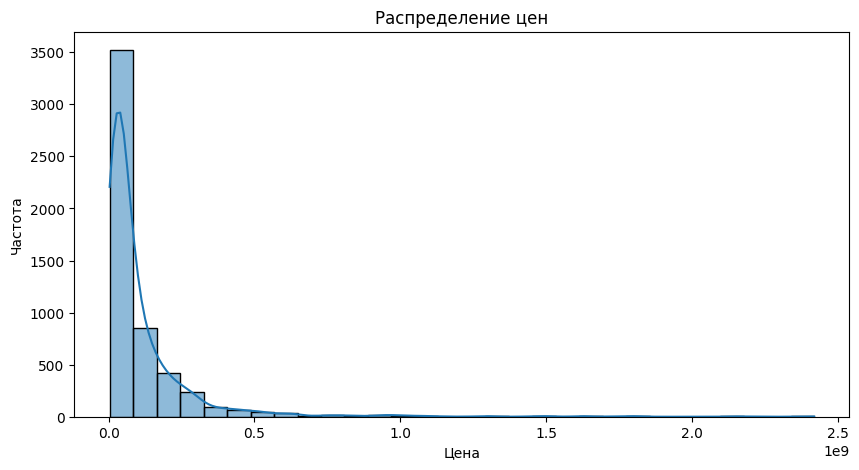

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

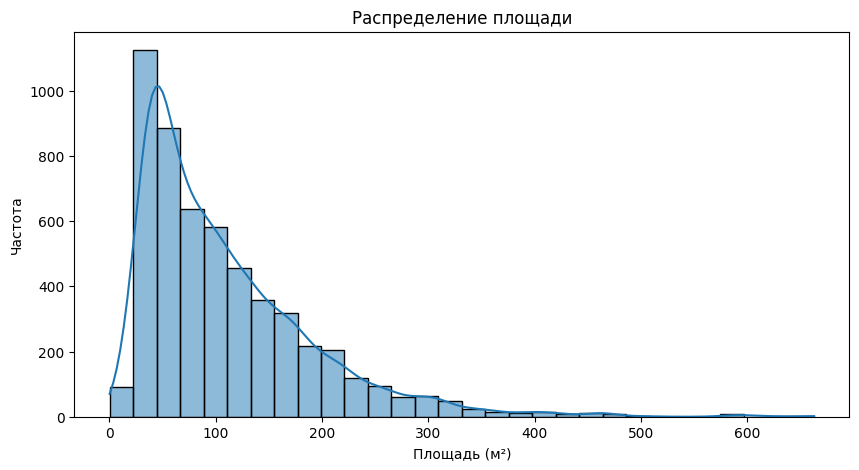

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_meters'], bins=30, kde=True)
plt.title('Распределение площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Частота')
plt.show()

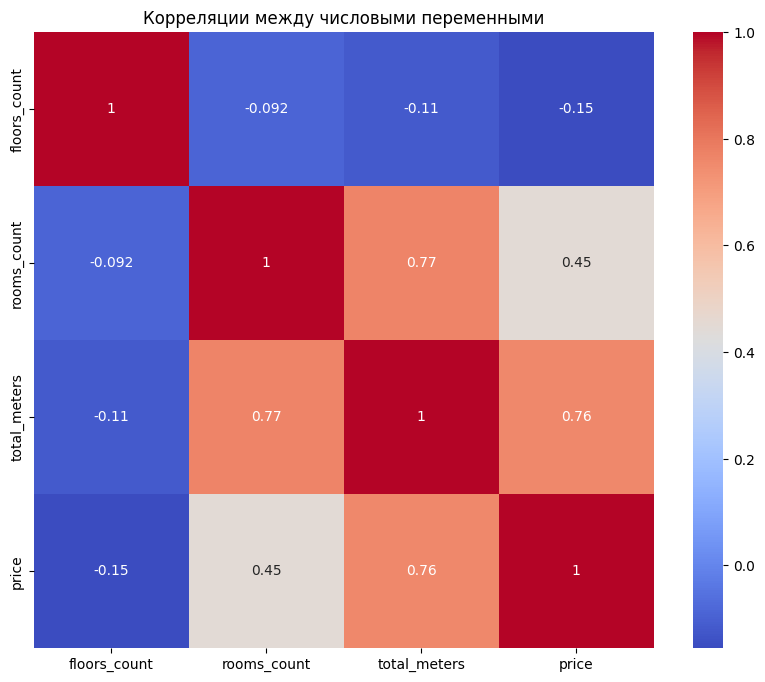

In [47]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()

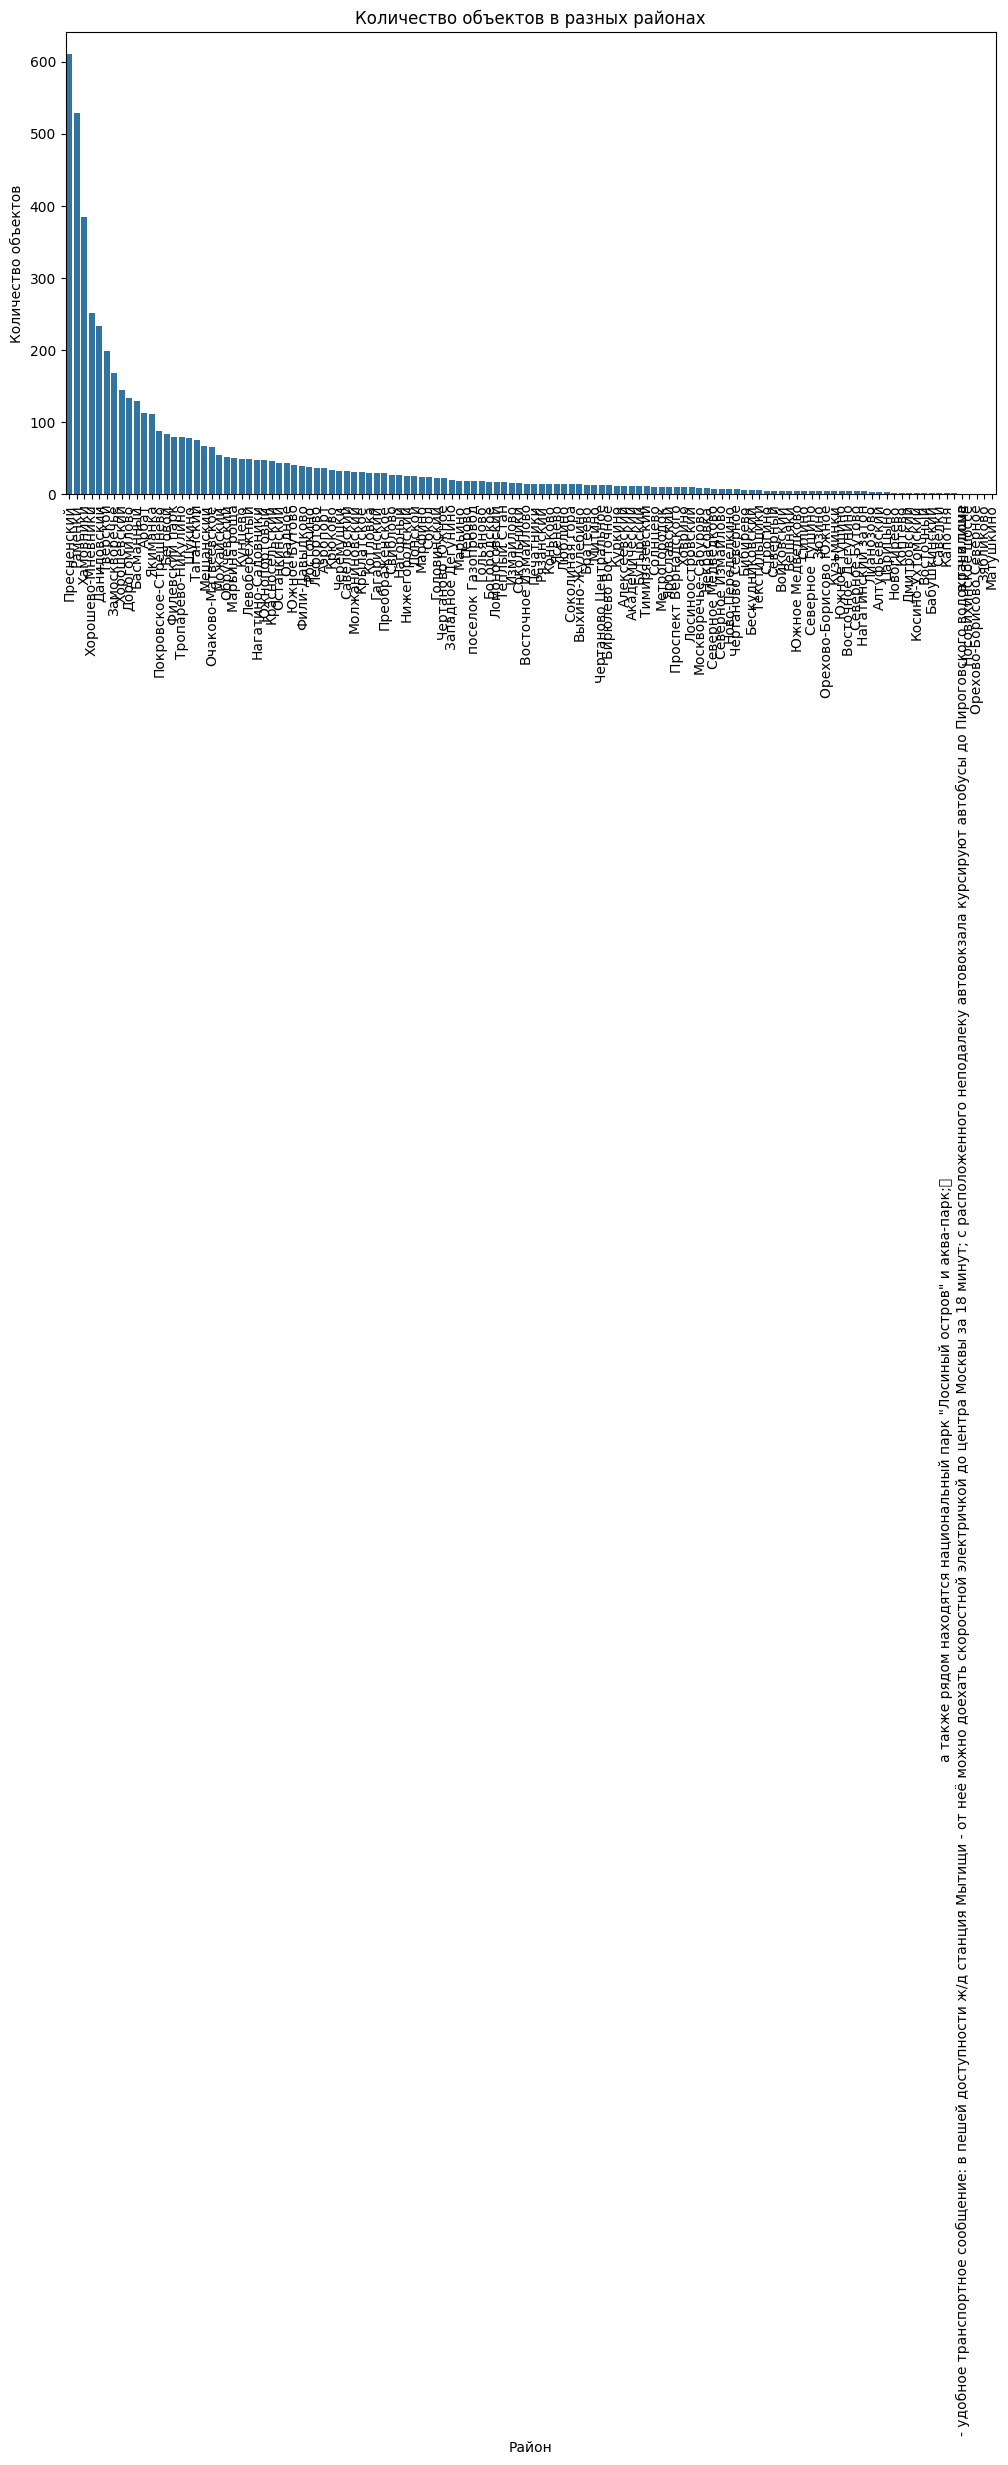

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='district', order=df['district'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Количество объектов в разных районах')
plt.xlabel('Район')
plt.ylabel('Количество объектов')
plt.show()

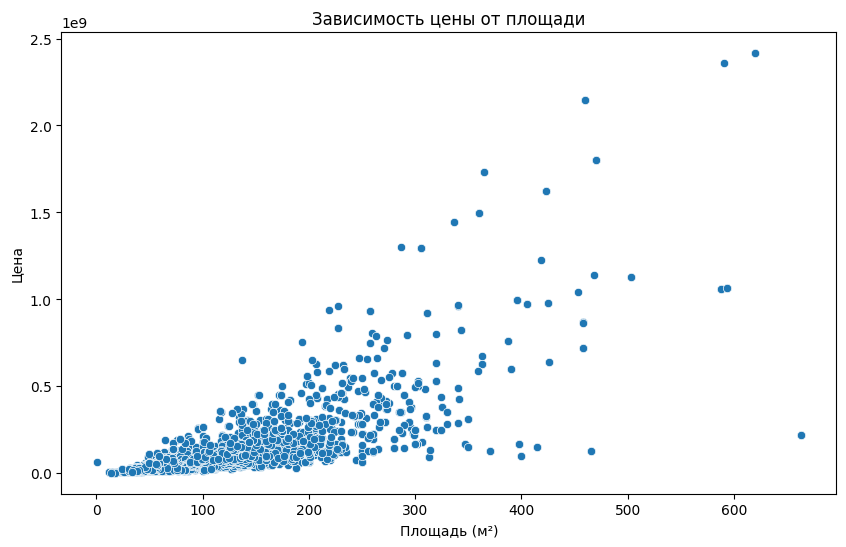

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_meters', y='price')
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена')
plt.show()


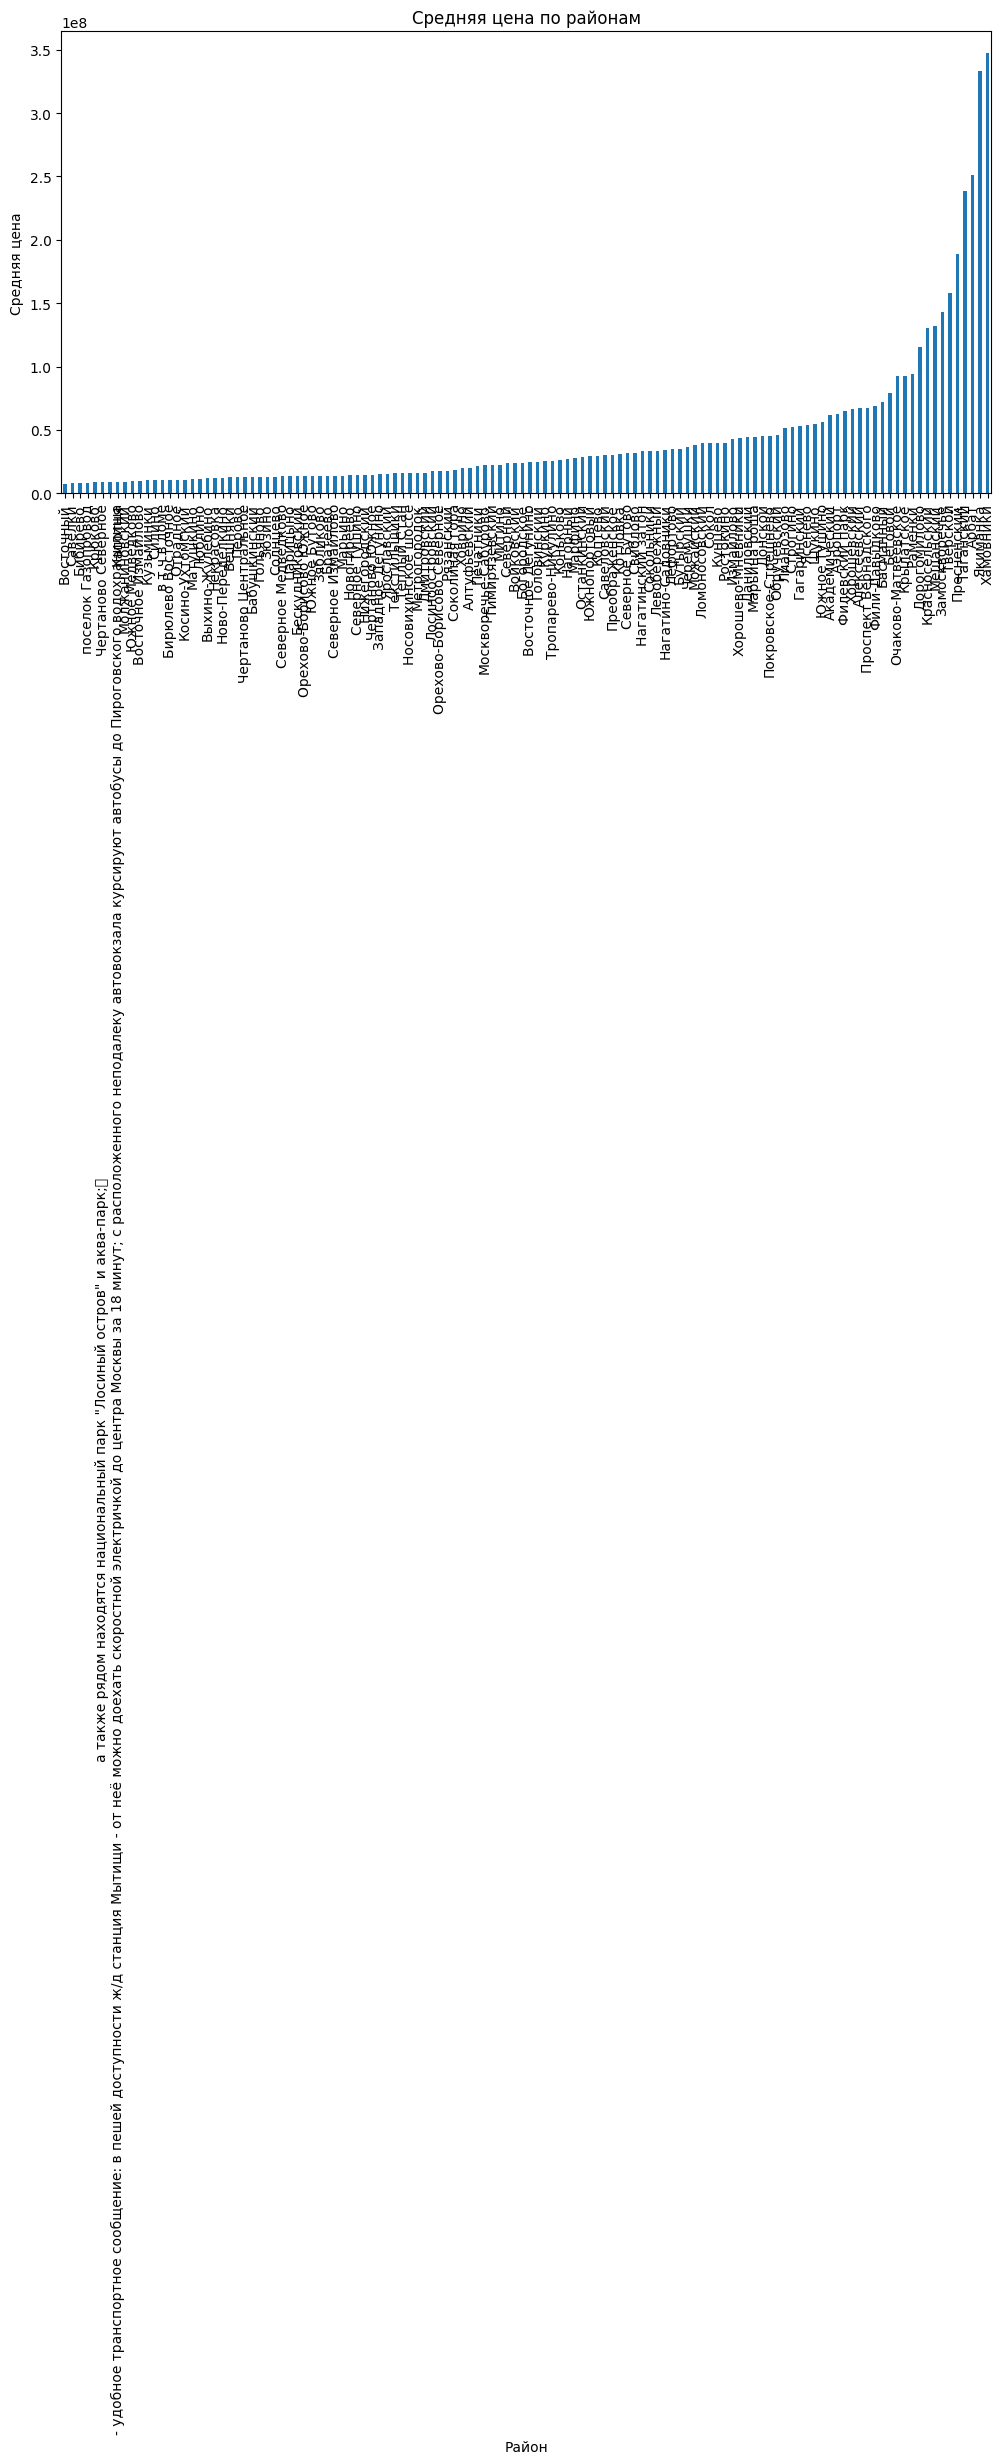

In [50]:
avg_price_per_district = df.groupby('district')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_price_per_district.plot(kind='bar')
plt.title('Средняя цена по районам')
plt.xlabel('Район')
plt.ylabel('Средняя цена')
plt.show()

In [4]:
df['price_per_meter'] = df['price'] / df['total_meters']

NameError: name 'df' is not defined